In [1]:
import os 
if os.path.basename(os.getcwd()) == "notebooks": os.chdir("..")
import datajoint as dj
dj.conn()

[2023-03-06 17:17:17,265][INFO]: Connecting root@0.0.0.0:3306
[2023-03-06 17:17:17,295][INFO]: Connected root@0.0.0.0:3306


DataJoint connection (connected) root@0.0.0.0:3306

In [2]:
from datetime import datetime
from pathlib import Path
from workflow.pipeline import ephys, probe, induction, lineage

In [5]:
# Sample dataset directory structure for one subject, session, and probe
#    subjectAS001
#     ├── session2022-07-19
#     ├──── probe111
#     ├────── AS001_190722_204331.rhs
#     ├────── AS001_190722_204431.rhs
#     ├────── AS001_190722_204531.rhs
#     ├────── AS001_190722_204631.rhs
#     └────── AS001_190722_204731.rhs

In [3]:
# Insert into induction.OrganoidExperiment table (most upstream table)
lineage.Induction.insert1(
        {
        "induction_id": "O6",
        "family": "Fam2_P",
        "line": "F2P6",
        "passage_id": "1",
        }
    ) 

induction.OrganoidCulture.insert1(
        {
            "induction_id": "O6",
            "matrigel_id": "01",
            "organoid_embed_date": "2000-01-01",
        }
    )

induction.Experiment.insert1(
        {
            "experiment_id": "O6"
        }
    )

induction.OrganoidExperiment.insert1(
        {
            "induction_id": "O6",
            "matrigel_id": "01",
            "experiment_id": "O6", 
            "experiment_datetime": datetime.strptime("190722204331", "%y%m%d%H%M%S"), 
            "experiment_dir": "O6", 
            "experiment_plan": "ephys", 
        }
    )

induction.OrganoidExperiment()

induction_id de-identified code,matrigel_id,"experiment_id i.e. rosette id and organoid id, e.g. AS001",experiment_datetime Experiment start time,experiment_dir Path to the subject data directory,"experiment_plan ephys, tracing"
O6,1,O6,2019-07-22 20:43:31,O6,ephys


### Ingest `probe` schema


In [4]:
probe.ProbeType.insert1(
    {
        "probe_type": "NeuroNexus-A4x16-Poly2-5mm",
        "probe_full_name": "A4X16-Poly2-5mm-23s-200-177-H64LP_30mm",
    }
)

probe_config = {"probe_type": "NeuroNexus-A4x16-Poly2-5mm",
                "site_count_per_shank": 4,
                "col_spacing": None,
                "row_spacing": 20,
                "white_spacing": None,
                "col_count_per_shank": 1,
                "shank_count": 4,
                "shank_spacing": 100
                }

electrode_layouts = probe.build_electrode_layouts(**probe_config)
probe.ProbeType.Electrode.insert(electrode_layouts)

probe.Probe.insert1(
    {
        "probe": "111",
        "probe_type": "NeuroNexus-A4x16-Poly2-5mm",
        "probe_comment": "Example probe",
    }
)

channel_to_electrode_map = {
                            "D-000": 0,
                            "D-001": 1,
                            "D-002": 2,
                            "D-003": 3,
                            "D-004": 4,
                            "D-005": 5,
                            "D-006": 6,
                            "D-007": 7,
                            "D-008": 8,
                            "D-009": 9,
                            "D-010": 10,
                            "D-011": 11,
                            "D-012": 12,
                            "D-013": 13,
                            "D-014": 14,
                            "D-015": 15}
electrode_keys = [
    {"probe_type": "NeuroNexus-A4x16-Poly2-5mm", "channel": c, "electrode": e}
    for c, e in channel_to_electrode_map.items()
]

ephys.generate_electrode_config(
    probe_type="NeuroNexus-A4x16-Poly2-5mm", electrode_keys=electrode_keys
)

{'electrode_config_hash': UUID('f2b8cfac-94cd-2564-da65-60493543f043')}

In [5]:
display(probe.Probe())
display(probe.ProbeType())
display(probe.ProbeType.Electrode())
display(probe.ElectrodeConfig())
display(probe.ElectrodeConfig.Electrode())

probe unique identifier for this model of probe (e.g. serial number),probe_type e.g. neuropixels_1.0,probe_comment
111,NeuroNexus-A4x16-Poly2-5mm,Example probe


probe_type e.g. neuropixels_1.0,"probe_full_name full, non-abbreviated name of the probe"
NeuroNexus-A4x16-Poly2-5mm,A4X16-Poly2-5mm-23s-200-177-H64LP_30mm


probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","shank shank index, starts at 0, advance left to right","shank_col column index, starts at 0, advance left to right","shank_row row index, starts at 0.",x_coord (um) x coordinate of the electrode within the probe.,y_coord (um) y coordinate of the electrode within the probe.
NeuroNexus-A4x16-Poly2-5mm,0,0,0,0,0.0,0.0
NeuroNexus-A4x16-Poly2-5mm,1,0,0,1,0.0,20.0
NeuroNexus-A4x16-Poly2-5mm,2,0,0,2,0.0,40.0
NeuroNexus-A4x16-Poly2-5mm,3,0,0,3,0.0,60.0
NeuroNexus-A4x16-Poly2-5mm,4,1,0,0,100.0,0.0
NeuroNexus-A4x16-Poly2-5mm,5,1,0,1,100.0,20.0
NeuroNexus-A4x16-Poly2-5mm,6,1,0,2,100.0,40.0
NeuroNexus-A4x16-Poly2-5mm,7,1,0,3,100.0,60.0
NeuroNexus-A4x16-Poly2-5mm,8,2,0,0,200.0,0.0
NeuroNexus-A4x16-Poly2-5mm,9,2,0,1,200.0,20.0


electrode_config_hash,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,0-15


electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","channel channel name fetched from raw data (e.g., A-001)"
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,0,D-000
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,1,D-001
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,2,D-002
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,3,D-003
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,4,D-004
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,5,D-005
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,6,D-006
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,7,D-007
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,8,D-008
f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,9,D-009


### Insert into `ephys.RawData`


In [6]:
ephys.RawData()

induction_id de-identified code,matrigel_id,"experiment_id i.e. rosette id and organoid id, e.g. AS001",experiment_datetime Experiment start time,start_time date and time of file creation,file_name name of the file,file_path


In [17]:
from element_interface.utils import find_full_path
from workflow.pipeline import ephys
from workflow.utils.paths import (get_ephys_root_data_dir,
                                  get_subject_directory)

from datetime import datetime
import re
import numpy as np

subject_key = induction.OrganoidExperiment.fetch1("KEY") 

subject_dir = find_full_path(
    get_ephys_root_data_dir(), get_subject_directory(subject_key)
)

ingested_files = set([Path(file).name for file in ephys.RawData.fetch("file_path")])

data_files = set([Path(file).name for file in subject_dir.rglob("*.rhs")])

raw_data_list = []
start_date = ""

for file in data_files.difference(ingested_files):
    if not start_date:
        start_date = re.search(r".*_(\d{6})_", file).groups()[0]
    start_time = re.search(r".*_(\d{6}_\d{6})", file).groups()[0]
    start_time = np.datetime64(
        datetime.strptime(start_time, "%y%m%d_%H%M%S")
    )  # start time based on the file name

    raw_data_list.append(        
        {
        **subject_key,
        "start_time": start_time,
        "file_name": file,
        "file_path": subject_dir /  start_date / file,
        })        

ephys.RawData.insert(
    raw_data_list
)


In [18]:
ephys.RawData()

induction_id de-identified code,matrigel_id,"experiment_id i.e. rosette id and organoid id, e.g. AS001",experiment_datetime Experiment start time,start_time date and time of file creation,file_name name of the file,file_path
O6,1,O6,2019-07-22 20:43:31,2019-07-22 20:43:31,O6_190722_204331.rhs,=BLOB=
O6,1,O6,2019-07-22 20:43:31,2019-07-22 20:44:31,O6_190722_204431.rhs,=BLOB=
O6,1,O6,2019-07-22 20:43:31,2019-07-22 20:45:31,O6_190722_204531.rhs,=BLOB=
O6,1,O6,2019-07-22 20:43:31,2019-07-22 20:46:31,O6_190722_204631.rhs,=BLOB=
O6,1,O6,2019-07-22 20:43:31,2019-07-22 20:47:31,O6_190722_204731.rhs,=BLOB=


### Insert into `ephys.EphysSession`

In [20]:
key = induction.OrganoidExperiment.fetch1("KEY")

start_time = datetime.strptime("190722_204331", "%y%m%d_%H%M%S")
end_time = datetime.strptime("190722_204631", "%y%m%d_%H%M%S")

ephys.EphysSession.insert1(
        {**key, 
        "insertion_number": 0, 
        "start_time": start_time, 
        "end_time": end_time, 
        "probe": "111", 
        "electrode_config_hash": "f2b8cfac-94cd-2564-da65-60493543f043", "session_type": "lfp"
        } 
    )

ephys.EphysSession()

induction_id de-identified code,matrigel_id,"experiment_id i.e. rosette id and organoid id, e.g. AS001",experiment_datetime Experiment start time,insertion_number,start_time,end_time,probe unique identifier for this model of probe (e.g. serial number),electrode_config_hash,session_type analysis method
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,111,f2b8cfac-94cd-2564-da65-60493543f043,lfp


### Populate `ephys.EphysSessionInfo`


In [5]:
ephys.EphysSessionInfo.populate()
ephys.EphysSessionInfo()

induction_id de-identified code,matrigel_id,"experiment_id i.e. rosette id and organoid id, e.g. AS001",experiment_datetime Experiment start time,insertion_number,start_time,end_time,attribute_name,attribute_blob
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,amp_settle_channels,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,amplifier_channels,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,board_adc_channels,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,board_dac_channels,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,board_dig_in_channels,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,board_dig_out_channels,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,charge_recovery_channels,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,compliance_limit_channels,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,frequency_parameters,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,notes,=BLOB=


### Plot data


In [5]:
import intanrhsreader
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import signal

TARGET_SAMPLING_RATE = 2500

subject_key = induction.OrganoidExperiment.fetch1("KEY")
session_key = (ephys.EphysSession - "session_type='spike_sorting'" & subject_key).fetch1("KEY")

# Load the data
files = (
    ephys.RawData
    & f"start_time BETWEEN '{session_key['start_time']}' AND '{session_key['end_time']}'"
).fetch("file_path", order_by="start_time")
file = files[0]  # plot the first file
data = intanrhsreader.load_file(file)

header = data.pop("header")
lfp_sampling_rate = header["sample_rate"]
powerline_noise_freq = header["notch_filter_frequency"]  # in Hz
downsample_factor = int(lfp_sampling_rate / TARGET_SAMPLING_RATE)

channels = [
    ch["native_channel_name"] for ch in data["amplifier_channels"]
]  # channels with raw ephys traces
lfp_traces = data["amplifier_data"]
lfp_data = {ch: lfp for ch, lfp in  zip(channels, lfp_traces)}

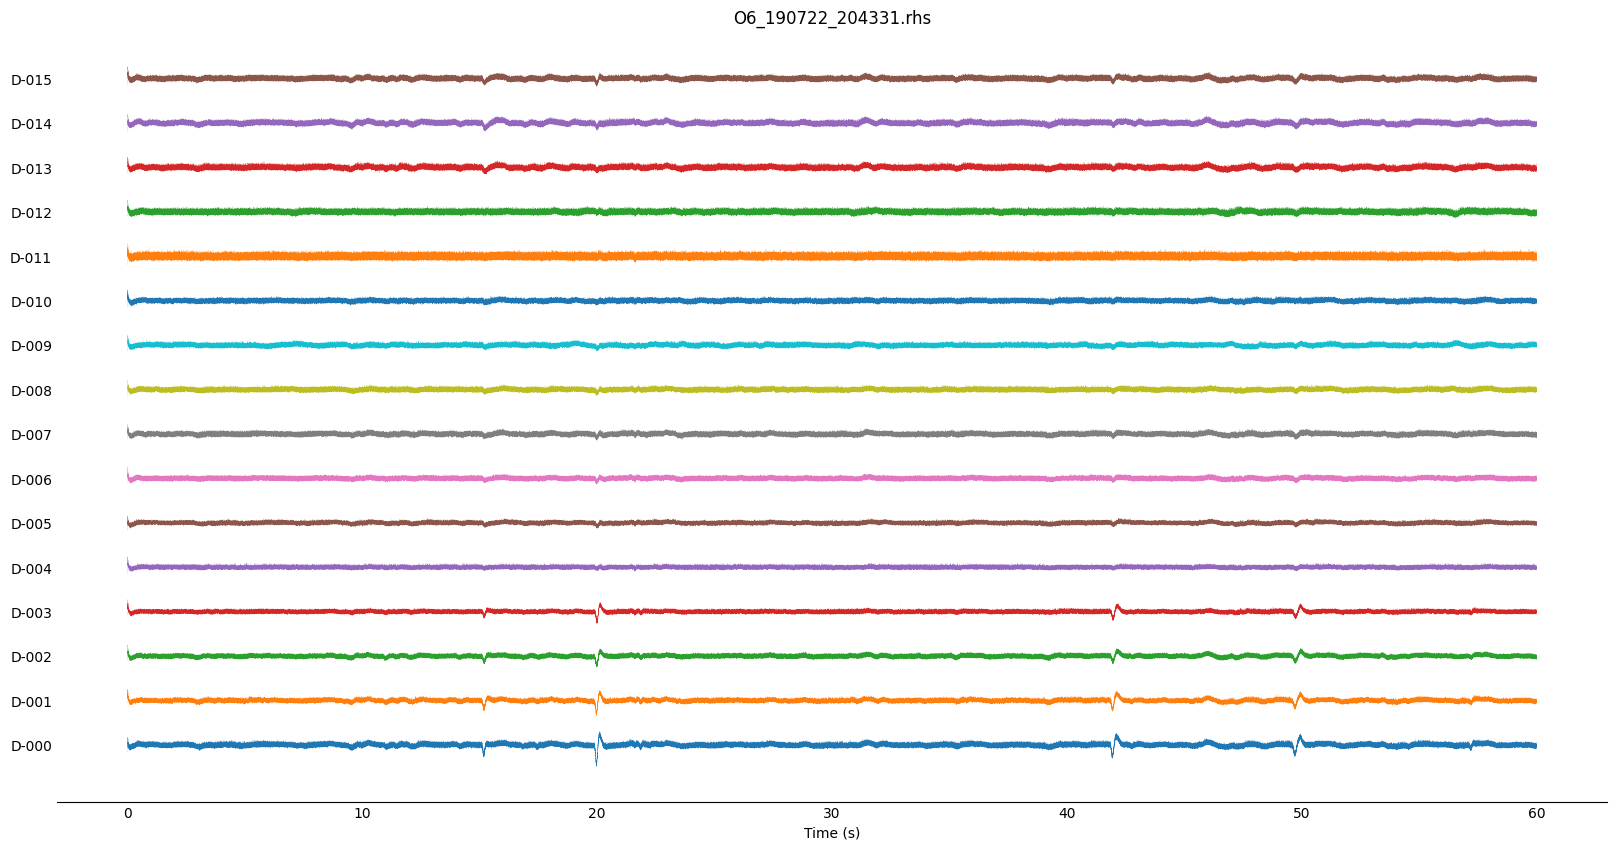

In [6]:
# plot all channels
fig, ax = plt.subplots(figsize=(20, 10))
ytick_loc = []
for i, (ch, lfp) in enumerate(lfp_data.items()): 
    ytick_loc.append(i * 500)
    ax.plot(data["t"], lfp + ytick_loc[-1], linewidth=0.1)
ax.set_yticks(ytick_loc)
ax.set_yticklabels(lfp_data.keys())
ax.tick_params(length=0)
ax.set(xlabel="Time (s)", title=Path(file).name)
sns.despine(right = True, left = True)
plt.show()

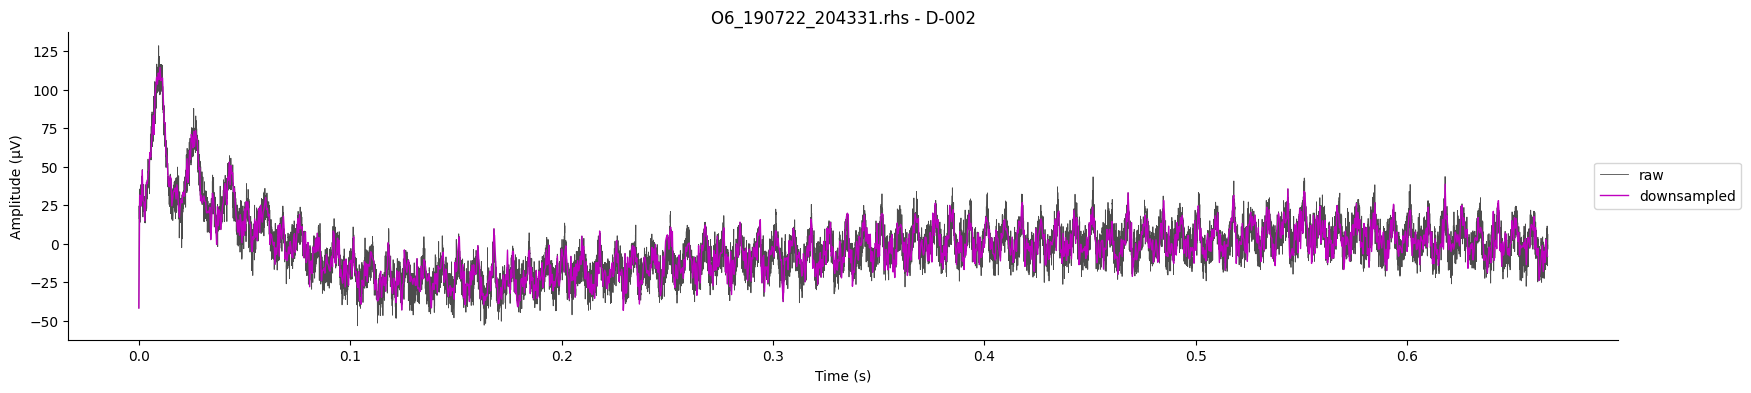

In [10]:
# Plot raw vs. downsampled data
channel = "D-002"
nb_data_points = 20000   
fig, ax = plt.subplots(figsize=(20, 4))

timestamps, lfp = data["t"][:nb_data_points], lfp_data[channel][:nb_data_points]
timestamps_downsampled, lfp_downsampled = timestamps[::downsample_factor], lfp[::downsample_factor]

ax.plot(timestamps, lfp, 'k', linewidth=0.6, alpha=0.7, label="raw")
ax.plot(timestamps_downsampled, lfp_downsampled, 'm', linewidth=1, label="downsampled")
ax.set(xlabel="Time (s)", ylabel="Amplitude (μV)", title=f"{Path(file).stem}.rhs - {channel}")
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(0.98, 0.5)) 
plt.show()

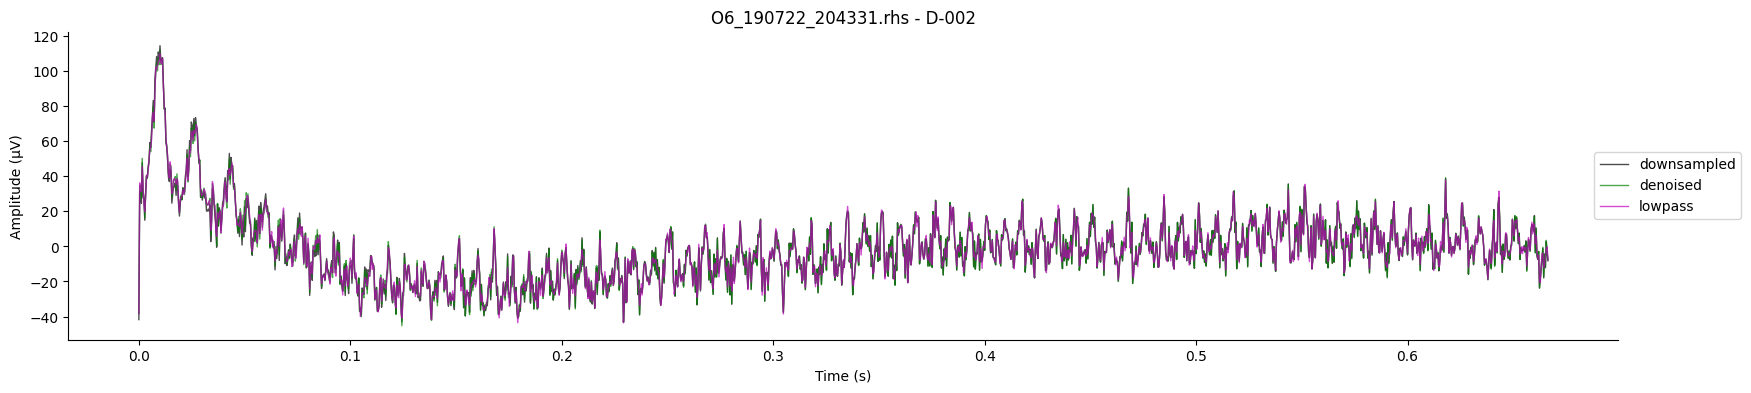

In [11]:
# Raw data vs. denoised vs. lowpass-filtered
b_notch, a_notch = signal.iirnotch(
    w0=powerline_noise_freq, Q=30, fs=TARGET_SAMPLING_RATE
)
lfp_denoised = signal.filtfilt(b_notch, a_notch, lfp_downsampled)

# Lowpass filter
b_butter, a_butter = signal.butter(
    N=4, Wn=1000, btype="lowpass", fs=TARGET_SAMPLING_RATE
)
lfp_lowpass = signal.filtfilt(b_butter, a_butter, lfp_denoised)

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(timestamps_downsampled, lfp_downsampled, 'k', linewidth=1, alpha=0.7, label="downsampled")
ax.plot(timestamps_downsampled, lfp_denoised, 'g', linewidth=1, alpha=0.7, label="denoised")
ax.plot(timestamps_downsampled, lfp_lowpass, 'm', linewidth=1, alpha=0.7, label="lowpass")

ax.set(xlabel="Time (s)", ylabel="Amplitude (μV)", title=f"{Path(file).stem}.rhs - {channel}")
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(0.98, 0.5)) 
plt.show()

### Populate `ephys.LFP`


In [12]:
ephys.LFP.populate()
display(ephys.LFP())
display(ephys.LFP.Trace())

induction_id de-identified code,matrigel_id,"experiment_id i.e. rosette id and organoid id, e.g. AS001",experiment_datetime Experiment start time,insertion_number,start_time,end_time,lfp_sampling_rate (Hz) down-sampled sampling rate.,header
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,2500.0,=BLOB=


induction_id de-identified code,matrigel_id,"experiment_id i.e. rosette id and organoid id, e.g. AS001",experiment_datetime Experiment start time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",lfp
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,5,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,11,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,6,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,7,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,2,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,12,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,0,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,3,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,10,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,8,=BLOB=
